In [1]:
# Generic imports
import pandas as pd
import plotly
import plotly.graph_objects as go

# 5G visualization logic
import trace_plotting
from utils.wireshark import import_pcap_as_dataframe
import logging
import platform

In [2]:
# Wireshark trace with 5GC messages
#wireshark_traces = 'traces/Spirent RID-942 50UEs UDP 350Mbps/21-03-16_15.47.45__RID-942__ts0_eth3_capture.pcap'
wireshark_traces = 'D:\\Temp\\free5gc.pcap'
#wireshark_traces = 'D:\\Temp\\volte_calls_2.pcapng'
#wireshark_traces = 'D:\\Temp\\s1ap_volte.pcapng'
#wireshark_traces = 'D:\\Temp\\SIP MT offnet.pcap'


In [3]:
# DEBUG loggig level for big traces so that you can see if processing is stuck or not
packets_df = import_pcap_as_dataframe(
    wireshark_traces, 
    http2_ports = "32445,5002,5000,32665,80,32077,5006,8080,3000,8081",
    wireshark_version = 'OS',
    platform = platform.system(),
    logging_level=logging.INFO)
#display(packets_df)

In [4]:
plot_data = trace_plotting.generate_scatterplots_for_wireshark_traces(packets_df, filter_column='file')[0]
#display(plot_data)

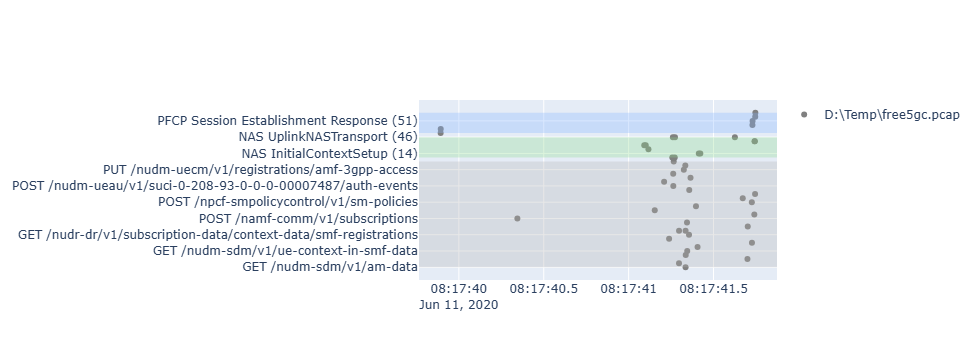

In [5]:
fig = go.Figure(data=plot_data)
fig.update_layout(shapes=trace_plotting.get_protocol_shapes(packets_df, y_axis='y'))
fig.show()
out_html = ''.join(wireshark_traces.split('.')[0:-1]) + '_pcap_plot.html'
fig.write_html(out_html)